## QUESTÃO 2

In [195]:
precos=pd.read_excel('ipeadata[03-08-2021-01-00].xls')
desocupacao=pd.read_excel('ipeadata[03-08-2021-01-03].xls')
exp_infl=pd.read_excel('ipeadata[03-08-2021-01-06].xls')

In [196]:
#a=desocupacao.merge(precos,on='Data',how='left')
#agregated=a.merge(exp_infl,on='Data',how='left')

In [197]:
#agregated.columns=['data','taxa desocupacao','ipca','ipca-e']

In [198]:
precos_mar_2011=precos[precos['Data']>=2011.03]
precos_mar_2011=precos_mar_2011.reset_index(drop=True)

In [199]:
e_mar_2011=exp_infl[exp_infl['Data']>=2011.03]
e_mar_2011=e_mar_2011.reset_index(drop=True)

In [200]:
efetiva=[]
for i in range(12,110):
    efetiva.append(((precos_mar_2011.iloc[i,1])/(precos_mar_2011.iloc[i-12,1]-1)*100))

In [201]:
un=desocupacao.iloc[:,1].mean()

In [202]:
inflacao_modelo=[]
for i in range(12,110):
    inflacao_modelo.append(-4.59+2.026*e_mar_2011.iloc[i,1]+0.34*(desocupacao.iloc[i,1]-un))

In [203]:
inflacao_modelo=np.array(inflacao_modelo)+100

In [204]:
import matplotlib.pyplot as plt

In [205]:
import numpy as np
mes=np.arange(98)

In [206]:
from matplotlib.pyplot import figure

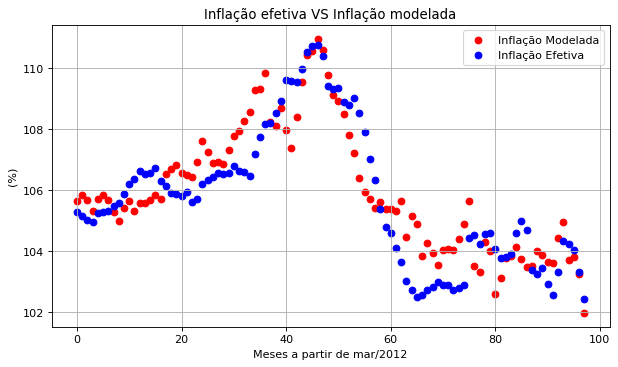

In [207]:
figure(figsize=(9, 5), dpi=80)
plt.scatter(mes,inflacao_modelo,color='r',label='Inflação Modelada')
plt.scatter(mes,efetiva,color='b', label='Inflação Efetiva')
plt.title('Inflação efetiva VS Inflação modelada')
plt.xlabel('Meses a partir de mar/2012')
plt.ylabel('(%)')
plt.grid()
plt.legend()
plt.show()